# Simulation of Charged Particle Production
___

Colliding nuclei with high energy in particle accelerators is both a destructive and creative process. The acceleration of the nuclei to near light speed results in extremely high energy densities at the impact of the collision, where the high temperatures cause the nuclei to melt. However, the excess energy available excites the force fields, which leads to the creation of new particles following Einsteins mass-energy equivalence $E=mc^2$. The process has such high levels of complexity that to observe, let alone simulate, all phenomena and interactions occurring in the split of a second the particles collide and new particles emerge, is currently at the limits of our understanding. 


A toy model is a powerful tool used to investigate the complexity of nature. It is a highly simplified and idealized model of the real world, and we will, in the following, use a toy model to simulate the number of produced charged particles from a collision. The Glauber model is simulating nuclei collisions and computes the number of participants and the coordinates of the interacting nucleons $ N_{\mathrm{part}}, \{ {x_i,y_i,z_i|i=1,\ldots,N_{\mathrm{coll}}}\}$. We will use these calculations as an input to our toy model. After the number of charged particles is known, it will be possible to distribute the particles spatially in the relevant coordinate system $(\eta,\varphi)$. The last step involves using the distributions $\frac{\mathrm{d}^2N_{\mathrm{ch}}}{\mathrm{d}\eta\mathrm{d}\varphi}$, that represents the observed final state of particles in detectors, in an analysis.

## Number of Charged Particles

### A Random Experiment

There is a genuine level of randomness associated with many phenomena in nature, and the production of charged particles is no exception. A random variable drawn from its probability distribution is the value that describes the random phenomena. Various probability distributions can parameterize the number of charged particles. However, it is a rather conventional choice to use the Negative Binomial Distribution (NBD) since the random variable from an NBD reflects our understanding of the random process of particle production [[Alner et al(1985)](https://doi.org/10.1016/0370-2693(85)91492-3),[Ansorge et al (1989)](https://doi.org/10.1007/BF01506531)]. 

A binomial distribution often characterizes a random experiment, where it is the probability of the number of [Bernoulli trials](https://en.wikipedia.org/wiki/Bernoulli_trial) with a specific outcome. A Bernoulli trial is one that has a binary outcome:

 - True _or_ False
 - Success _or_ Failure 
 - $A$ _or_ $B$

Thus, we can say that the binomial distribution describes the probability of $k$ $A$'s out of $n$ possible.  Or, for the negative binomial - the probability of $k$ $B$'s  before $n$ $A$'s.

In other words, the NBD differs from standard binomial distributions which usually counts the number of successes given a certain number of trials. Instead, the NBD counts the number of failures before a given number of successes (or counts the number of successes before a given number of failures).  Because the number of failures is simply a label we are assigning an _outcome_ of a Bernoulli trial, we are allowed to switch between the labelling interchangeably as required.

### The Toy Model
The NBD suggests to be a reasonable choice for describing the random nature of particle production. Nevertheless, the next question that arises is how to implement it in the toy model, together with the Glauber calculations.  Remember, the goal is to create a model of particle production by applying the calculations delivered by the Glauber model, i.e. the number of participants and the collision coordinates. 


The idea is to reformulate the output of the Glauber calculation to a combined source of emerged particles in a given collision. In other words, we will define a single source to build particles from by applying a so-called _ancestor model_ to the output delivered by the Glauber calculation. Examples of ancestor models are


- Two-component $N_\mathrm{{anc}} = \alpha \: N_\mathrm{{part}} + (1-\alpha) \: N_\mathrm{{coll}}$

- Hard two-component $N_\mathrm{{anc}} = (1-\alpha) \: N_\mathrm{{part}} \: / \: 2 + \alpha \: N_\mathrm{{coll}}$ 
- Power-law in number of participants $N_\mathrm{{anc}} = N_\mathrm{{part}}^{\alpha}$
- Power-low in number of binary collisions $N_\mathrm{{anc}} = N_\mathrm{{coll}}^{\alpha}$

Where $\alpha \in [0,1]$ is the ancestor parameter. 
Using either of these models, we arrive at our number of sources $N_{\mathrm{anc}}$.  Given the number of sources, and some model of charged particle production _per source,_ we can calculate the number of charged particles produced.  Examples of charged-particle production per source are 

- NBD $ N_\mathrm{{ch}} \sim \mathrm{NB}[N_\mathrm{anc} k,\frac{\mu}{\mu+k}]$
- Poisson $ N_\mathrm{{ch}} \sim \mathcal{P} [ N_\mathrm{{anc}} \mu]$
- Normal $N_\mathrm{{ch}} \sim \mathcal{N} [N_\mathrm{{anc}}\mu,k\sqrt{N_\mathrm{{ancestors}}\mu}]$
- Constant $N_\mathrm{{ch}} =N_\mathrm{{ancs}}\mu$

Thus, the produced number of particles per source could be distributed according to NBD. If this is the case then for a given ancestor, we describe the probability of $n$ particles produced before we get $k$ failures in a series of $n+k$ independent trials. 

### The Negative Binomial Distribution

The probability mass function of the number of failures $k$ before the $n^{\mathrm{th}}$ success _in independent trials_ is given by 

$$f(k) = \binom{k+n-1}{n-1} p^n (1-p)^k \quad, $$
where $p$ is the probability of a single success. We wish to flip this around to express the exact opposite, i.e. 
the probability density of the number of _successes_ $n$ before the $k^{\mathrm{th}}$ _failure_


$$ f(n) = \binom{n+k-1}{k-1} p^k (1-p)^n \quad. $$

Here $n$ is the number of charged particles produced _per_ ancestor. 

We will in the following show how it is possible to rewrite the NBD as a $\gamma$-Poisson mixture using _SymPy_. The mixture allows us to sample with the number of ancestors in a continuum $N_\mathrm{anc} \in \mathbb{R}$.

In [1]:
from sympy.stats import density, Expectation, NegativeBinomial, Probability
from sympy import symbols, Sum

k = symbols("k", real=True, positive=True) # k failures
n = symbols("n", integer=True, positive=True) # n successes
p = symbols("p",nonnegative=True) # probability of success

X = NegativeBinomial("X",k, p) # random variable X ~ NB(k,p)

Now $X$ is a random variable distributed to $\mathrm{NB}(k,p)$ where $k$ is the number of failures and $p$ is the probability of a single success. Let see what the probability density funciton (PDF) looks like for the number of successes $n$

In [2]:
NB = density(X)(n)
NB

p**n*(1 - p)**k*binomial(k + n - 1, n)

We will find the expectation value (or the average number of charged particles produced per ancestor) by

In [3]:
Expectation(X).rewrite(Probability)

Sum(x*Probability(Eq(X, x)), (x, 0, oo))

and thus

In [4]:
Expectation(X).rewrite(Sum)

Sum(X*p**X*(1 - p)**k*binomial(X + k - 1, X), (X, 0, oo))

Evaluting the sum we get

In [5]:
Expectation(X).evaluate_integral().simplify()

Piecewise((k*p/(1 - p), p < 1), ((1 - p)**k*Sum(X*p**X*gamma(X + k + 1)/((X + k)*gamma(X + 1)), (X, 0, oo))/gamma(k), True))

The first term is for $p<1$, and since $p \in [0,1]$ this is the expectation value of the NBD. Let save this in a variable $\mu$.

In [6]:
from sympy import Eq, solve
mu = symbols("mu", real=True, positive=True) # expectation value or avg. number of Nch/Nancestors

In [7]:
expect_val = Eq(mu,k*p/(1-p))

In [8]:
expect_val

Eq(mu, k*p/(1 - p))

The expectation value for the number of charged particles _per_ ancestors is thus
$$\mathbb{E}[n]=\mu=\frac{k(1-p)}{p}$$

which allows us to find the expression for the probability of a single success $p$

In [9]:
solve(expect_val,p)[0]

mu/(k + mu)

Thus, the probablity of success is  $p=\frac{\mu}{\mu + k}$ . 

The NBD can be rewritten as a $\gamma$-Poisson mixture. We will thus sample $n$ particles per ancestor from a Poisson with the parameter $\Lambda$ where, $\Lambda = \lambda$ (the mean of Poisson) itself is a random variable distributed according to $\Lambda \sim \gamma(a,b)$. Here the $\gamma$ distribution is given by

$$\gamma(\Lambda=\lambda;a,b) = \frac{1}{\Gamma(a)b^a}\lambda^{a-1}\mathrm{e}^{-\lambda/b}\quad,$$

In [10]:
from sympy import gamma as sygamma, exp as syexp
lamb, a,b = symbols('lambda a b',real=True,positive=True)
gamma = 1/(sygamma(a)*b**a)*lamb**(a-1)*syexp(-lamb/b) # gamma function
gamma

b**(-a)*lambda**(a - 1)*exp(-lambda/b)/gamma(a)

where we will come back to the values $a$ and $b$ (the shape and scaling parameters). Joining this distribution together with a Poisson we get 

In [11]:
from sympy import factorial
x = symbols("x",integer=True,positive=True)

poisson = lamb**x*syexp(-lamb)/factorial(x)

In [12]:
gamma*poisson

b**(-a)*lambda**x*lambda**(a - 1)*exp(-lambda)*exp(-lambda/b)/(factorial(x)*gamma(a))

The idea of letting $\lambda$ be a random variable and thereby allowing it to alternate can be utilized by integrating over all possible (positive) $\lambda$ values, in this manner we also obtain the _marginal_ (or unconditional) distribution, i.e. a distribution that no longer depends on $\lambda$

$$f(x;a,b,\lambda)=\frac{b^{-a}}{\Gamma(a) \Gamma(x+1)} \int_{0}^{\infty} \mathrm{d}\lambda \, \lambda^{x+a-1} \mathrm{e}^{-\lambda(1 + 1/b)} \quad,$$

where $x! = \Gamma(x+1)$ holds for $x$ as positive integer values. After integrating and evaluating we get


In [13]:
from sympy import integrate, oo
(gamma*poisson).integrate((lamb,0,oo)).simplify()


b**x*(b + 1)**(-a - x)*gamma(a + x)/(gamma(a)*gamma(x + 1))

We can immidieatly see that the $\Gamma$ terms resembles a binomial coefficient. If we define a binomial coeffient as

In [14]:
from sympy import binomial, gammasimp
binom_coeff = binomial(a+x-1,x)
binom_coeff

binomial(a + x - 1, x)

abd rewrite in terms of $\Gamma$

In [15]:
gammasimp(binom_coeff)

gamma(a + x)/(gamma(a)*gamma(x + 1))

we get the equivalent to the $\Gamma$ terms in the marginal distribution.

This only leaves us with the exponents. Lets try to expand and collect the exponents

In [16]:
from sympy import expand_power_exp

In [17]:
expand_power_exp(b**x*(b+1)**(-a-x))

b**x*(b + 1)**(-a)*(b + 1)**(-x)

The $x$ exponent terms can be rewritten as

In [18]:
(b**x*(b+1)**-x).simplify()

(b/(b + 1))**x

and thereforre this leaves us with

$$\binom{a+x-1}{x} \bigg(\frac{b}{b+1}\bigg)^{x} \bigg(\frac{1}{1+b} \bigg)^{a} \quad,$$

that we can compare to the PDF defined above

In [19]:
NB

p**n*(1 - p)**k*binomial(k + n - 1, n)

We recognize the  $\gamma$-Poisson as a NBD having the number of failures $a=k$ and the probability of _success_ as $p = \frac{b}{b+1}$ and therefore $b=\frac{p}{(1-p)}=\frac{\mu}{k}$. 

To actually model number of charged particles $N_\mathrm{ch}$ we will have to let $a$ be proportional to the number of ancestors because the particle production model is modeling for the number of chraged particles _per_ ancestor. 
In the following step we will redefine $a$ by letting it be proportional to the number of ancestors as $a=\mathrm{N_{ancestors}}k$, and again reminding ourselves that the found expectation value (mean) $\mu$ is the average number of charged particles _per_ ancestor. We are thereby ensured to sample $N_\mathrm{{ch}}$ and not $N_\mathrm{ch}/N_\mathrm{anc}$.
After inserting $b=\frac{\mu}{k}$  we arrive to the final distribution of charged particles

In [20]:
Nanc = symbols('N_\mathrm{anc}',real=True,positive=True)
nch = symbols("n_\mathrm{ch}", integer=True, positive=True)
Nch = NegativeBinomial("X",Nanc*k, mu/(mu+k)) 
NB = density(Nch)(nch)
NB

(mu/(k + mu))**n_\mathrm{ch}*(-mu/(k + mu) + 1)**(N_\mathrm{anc}*k)*binomial(N_\mathrm{anc}*k + n_\mathrm{ch} - 1, n_\mathrm{ch})

The expectation value of this NBD is then

In [21]:
Expectation(Nch).evaluate_integral().simplify()

Piecewise((N_\mathrm{anc}*mu, mu/(k + mu) < 1), (N_\mathrm{anc}*k**(N_\mathrm{anc}*k + 1)*(k + mu)**(-N_\mathrm{anc}*k)*Sum(X*mu**X*(k + mu)**(-X)*gamma(N_\mathrm{anc}*k + X + 1)/((N_\mathrm{anc}*k + X)*gamma(X + 1)), (X, 0, oo))/gamma(N_\mathrm{anc}*k + 1), True))

Thus, the expectation value for the number of charged particles with this particle producion model is $\mathbb{E}[N_\mathrm{ch}]=N_\mathrm{ancestors}\mu$.

## Ancestor Models
___


### The Two Component Model
The two component model computes the number of ancestors as 

$$N_\mathrm{anc} = \alpha \: N_\mathrm{part} + (1-\alpha) \: N_\mathrm{{coll}}
\quad\alpha \in [0,1]$$

In [22]:
def two_component(Npart,Ncoll,alpha):
    """Two component model as an ancestor model
    
    Computes the number of ancestors 
    
    Parameters
    ----------
    Npart : integer
        Number of participants
    Ncoll : integer
        Number of collisions
    alpha : float
        Ancestor parameter
        
    Returns
    -------
    Nanc : float
        Number of ancestors
    """
    
    Nanc = alpha * Npart + (1 - alpha)* Ncoll
    
    return Nanc

### The Hard Two Component Model
The hard two component model computes the number of ancestors as 

$$N_\mathrm{anc} = (1-\alpha) \: N_\mathrm{part} \: / \: 2 + \alpha \: N_\mathrm{coll}
\quad\alpha \in [0,1]$$


The _hard_ part hinges on the idea that $N_{\mathrm{coll}}$ scales as the number of collisions with large $Q^2$ (momentum transfer), while $N_{\mathrm{part}}$ scales as the number of interactions with low $Q^2$. This, however, has not been truly substantiated.

In [23]:
def hard_two_component(Npart,Ncoll,alpha):
    """
    """
    Nanc = (1-alpha)*Npart/2 + alpha*Ncoll
    return Nanc

### The $N_\mathrm{{part}}$  powerlaw
$$N_\mathrm{ancestors} = N_\mathrm{part}^{\alpha}\quad\alpha \in [0.5,1.4]$$

In [24]:
def npart_power(Npart,alpha,**kwargs):
    """
    """
    
    Nanc = Npart**alpha
    return Nanc

### The $N_\mathrm{coll}$  powerlaw
$$N_\mathrm{anc} = N_\mathrm{{coll}}^{\alpha}\quad\alpha \in [0.5,1.2]$$

In [25]:
def ncoll_power(Ncoll,alpha,**kwargs):
    """
    """
    
    Nanc = Ncoll**alpha
    return Nanc    

## Particle Production Models
___

### The Negative Binomial Distribution

In [26]:
def negative_binomial(Nanc,mu,k):
    """Negative Binomial Distribution (NBD)
    
    This is a charged particle production model based on the NBD.
    The NBD is modelled as a gamma-poisson mixture. 
    
    Parameters
    ---------- 
    Nanc : float 
        Number of ancestors
    
    mu : float
        The average number of charged particles produced per ancestor
    
    k : float
        The fluctuation around the average number of particles produced per ancestor
    
    Returns
    -------
    Nch : integer
        Number of charged particles produced
    
    """
    from numpy.random import gamma, poisson

    p = mu / (mu + k)
    a = Nanc * k
    b = p / (1-p)

    lamb = gamma(a,b)
    Nch = poisson(lamb)
    
    return Nch

### The Poisson Distribution

In [27]:
def poisson(Nanc,mu,**kwargs):
    """
    """
    from numpy.random import poisson
    Nch = poisson(Nanc*mu)
    return Nch

### The Gaussian Distribution

In [28]:
def gaussian(Nanc,mu,k):
    """
    """
    from numpy import sqrt
    from numpy.random import normal
    Nch = normal(Nanc*mu,k*sqrt(Nanc*mu))
    return Nch

### Fixed Number 

In [29]:
def fixed(Nanc,mu,**kwargs):
    """
    """
    Nch = Nanc * mu
    return Nch

## Charged Particle Production
***

In [30]:
def charged_particle_production(Npart,Ncoll,ancestor_model,particle_production_model):
    """Produce the number of charged particles created from a collisionn
    
    Produces the number of charged particles from the Glauber model output 
    coupled with a model for particle production    
    
    Parameters
    ----------
    Npart : integer 
        Number of participants
    
    Ncoll : integer
        Number of collisions
    
    ancestor_model : callable
        A function that computes the number of ancestors
    
    particle_production_model : callable
        A function that computes the number charged particles based on the
        number of ancestors.
        
    Returns
    -------
    Nch : integer
        The number of charged particles
    """
    
    # compute the number of ancestors
    Nanc = ancestor_model(Npart,Ncoll)
    
    # compute the number of charged particles
    Nch = particle_production_model(Nanc)
    
    return Nch

### Test of the $N_\mathrm{ch}$ distribution
___

Here we will test the parameters of $\alpha, \mu$ and $k$ to make sure that we are on the right track regarding produced particles. 

If $\alpha$ is zero it favors $N_\mathrm{coll}$, i.e. the number of ancestors only depends on the number of collisions. Likewise if $\alpha$ is equal to one it favours only $N_\mathrm{part}$. Below we test for the two component model as ancestor model and the NBD as production model. 

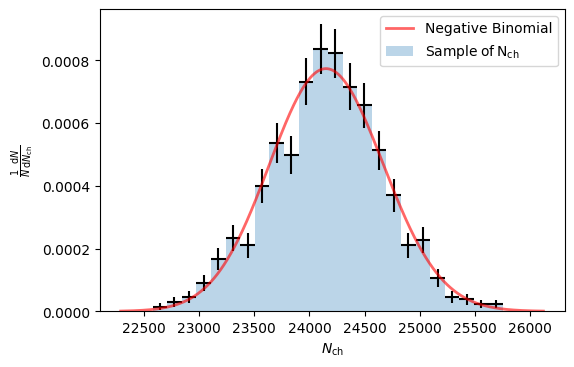

In [31]:
def test_two_component_NBD_model():

    from numpy.random import randint
    from numpy import full, arange
    from nbi_stat import histogram, plot_hist
    from functools import partial

    
    # create a 1000 'fake' central events
    Npart = full((1000,1),416) # all nucleons of both Pb nucleis participate
    Ncoll = full((1000,1),2000) # most central events have 2000 collisions
    
    # get the number of charged particles
    Nch = charged_particle_production(Npart,Ncoll,partial(two_component,alpha=0.5),partial(negative_binomial,mu=20,k=2))
    
    # create a historgram
    h  = histogram(Nch,normalize=True)
    
    # get number of ancestors (for drawing)
    Na = two_component(Npart,Ncoll,alpha=0.5)[0][0]
    
    # get parameters for NB pmf
    mu = 20
    k = 2 
    p = mu / (mu + k)
    n = Na * k
    
    # NOTE: We are generating the probability mass function of the number of failures.
    # Therefore for the probability of a __succes__ is p = 1-p
    p = 1-p 
    
    from scipy.stats import nbinom
    # get x values of NB pmf
    x = arange(nbinom.ppf(0.0001, n, p),
                  nbinom.ppf(0.9999, n, p))
    
    from matplotlib.pyplot import figure, gca, plot, ylabel, xlabel, legend
    fig = figure(dpi=100)
    ax = gca()
    plot(x, nbinom.pmf(x, n, p), '-r', lw=2, alpha=0.6,label='Negative Binomial')
    plot_hist(*h,as_bar=True,label=r'$\mathrm{Sample \: of \: N_{ch}}$',alpha=.3,ax=ax,color='C0');
    ylabel(r'$\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}N_\mathrm{ch}}$')
    xlabel(r'$N_\mathrm{ch}$')
    legend()

    return
test_two_component_NBD_model()

## Particle Distributions
---

### Rapidity Distribution
The next step involves creating rapidity distribution based on the number of charged particles.

In [32]:
def generate_rapidities(Nch, sigma):
    """Generate the rapidity distribution of charged particles
    
    The charged particle rapidities are distributed according to a normal distribution.
    This function corresponds to a single event, i.e. the distribution of the 
    created charged particles as a function of rapidity from single event collision. 
    
    Parameters
    ----------
    Nch : integer
        The number of charged particles
    sigma : float
        The width of the normal distribution
        
    Returns
    -------
    y : array(Nch)
        Rapidities of the charged particles
    """
    from numpy.random import normal
    
    y = normal(0,sigma,size=Nch)
    
    return y

A quick test to see the plot..

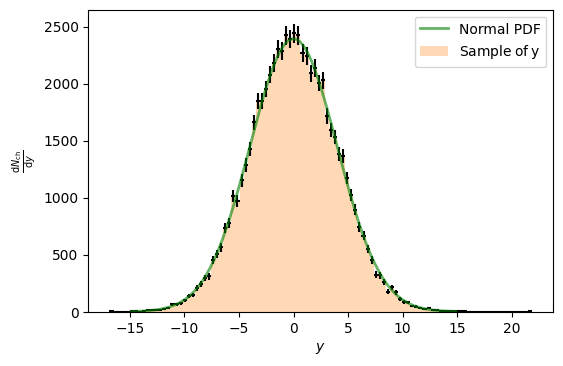

In [33]:
def test_rapidity_distribution(Nch=24000):
    
    from scipy.stats import norm
    from numpy import linspace

    # x values for the normal pdf
    x = linspace(norm.ppf(0.0001,scale=4),
                    norm.ppf(0.9999,scale=4), 1000)   
    
    # get rapidities
    y = generate_rapidities(Nch=Nch,sigma=4)
    
    from nbi_stat import histogram, plot_hist
    
    h  = histogram(y,normalize=False)
 
    from matplotlib.pyplot import figure, gca, plot, xlabel, ylabel, legend
    
    fig = figure(dpi=100)
    ax = gca()  
    plot(x, norm.pdf(x,scale=4)*Nch,'g-', lw=2, alpha=0.6, label='Normal PDF');
    plot_hist(*h,as_bar=True,label=r'$\mathrm{Sample \: of \: y}$',alpha=.3,ax=ax,color='C1');
    ylabel(r'$\frac{\mathrm{d}N_\mathrm{ch}}{\mathrm{d}y}}$')
    xlabel(r'$y$');
    legend();
    
    return
test_rapidity_distribution(Nch=24000)

## Pseudorapidity Distribution
___

Now we transform the rapidity distribution to pseudorapidiy. For in depth details see 
ch. 8 in Statistics Overview (nbi_python) by Chrisitan Holm Christensen. 

In [34]:
def dy_to_deta(y,a=1/2):
    """Transforms rapidity to pseudorapidity 
    
    The functions takes the rapidity distribution and transforms it 
    to a pseudorapidy distribution.   
 
    NOTE: This is taken from ch. 8 in Statistics Overview (nbi_python), 
    by Chrisitan Holm Christensen 

    Parameters
    ----------
    y : array(Nch)
        The rapidity distribution
    a : float
        The m/pT ratio of particles; default is 0.5        
    Returns
    -------
    eta : array(Nch)
        Pseudorapidities of charged particles
    """
    from numpy import tanh , sqrt , log, where
    
    t = tanh(y)
    tmp = -((1.+2.*a**2)*t**2 - 2.*t*sqrt(a**2+1.)*sqrt(a**2*t**2+1.) + 1.)/(t**2-1.)
    #eta = -0.5 * log(where(tmp > 0, tmp, 1e-11)) 
    eta = -0.5 * log(where(tmp > 0, tmp, 1e-8))  
    #eta = -0.5 * log(tmp[tmp >0]) 
        
    return eta 

Make a quick plotting test again ..  

/Users/zsaldic/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


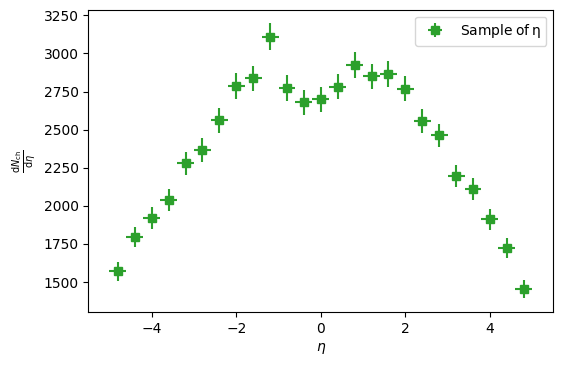

In [35]:
def test_y_to_eta(Nch=24000):
    from numpy import linspace

    # creates bin range and number of bins
    bins = linspace(-5,5,26)

    # get rapidities of an Nch=24000 event
    y = generate_rapidities(Nch=Nch,sigma=4)
    
    # convert rapidiy to pseudorapidity
    eta = dy_to_deta(y,a=1/2)
    
    from nbi_stat import histogram, plot_hist
    
    # create eta historam
    heta = histogram(eta,bins=bins ,normalize=False)
    
    from matplotlib.pyplot import figure, gca, plot, xlabel, ylabel, legend
    
    #plot
    fig = figure(dpi=100)
    plot_hist(*heta ,fmt='s',label=r'$\mathrm{Sample \: of \: \eta}$',color='C2');
    xlabel(r"$\eta$")
    ylabel(r"$\frac{\mathrm{d}N_{\mathrm{ch}}}{\mathrm{d}\eta}$")
    legend();
    
    return
test_y_to_eta();

## Azimuthal Distribution 
___

In the next step we are interested in making the azimuthal distribution. The azimuthal angles as distributed according to the fourier series 

$$f(\varphi;\mathbf{v},\mathbf{\Psi}) = 1+\sum_{n=1}^{N} v_n\cos\left(n\left[\varphi+\Psi_n\right]\right)$$

We begin by defining $f(\varphi)$ below.

In [36]:
def f(phi,vn,psin):
    """The azimuthal angle (phi) distribution of charged particles
    
    The charged particles are distributed according to
    
    f(φ;vn,𝚿) = 1 + Σ vn cos(n[φ+⁡ᴪn])
    
    NOTE: the sum is computed as a dot product and phi is defined in [0,2π]
    
    Parameters
    ----------
    phi : array of shape (Npoints,)
        The domain of phi  
        
    vn : list of length n OR array of shape (n,)
        The flow coefficients for each harmonic
        
    psi : list of length n OR array of shape (n,)
        The phases of the symmetry plane for each harmonic
        
    Returns
    -------
    f : array of shape (Npoints,)
        The distribution of phi
    """
    from numpy import asarray, arange, newaxis 
    
    # make sure to have arrays
    vn = asarray(vn)
    psin = asarray(psin)
    
    # create harmonics array
    n = arange(len(vn))+1
    
    # reshape vn, ᴪn, and n to row vectors (1,n)
    vn = vn.reshape((vn.shape[0], -1))
    psin = psin.reshape((psin.shape[0], -1))
    n = n.reshape((psin.shape[0], -1))
    
    vn = vn.T
    psin = psin.T
    n = n.T
    
    # reshape phi to a coloumn vector (Npoints,1)
    phi = phi[:,newaxis]   
    
    from numpy import broadcast_to, cos, dot
    
    # broadcast an (Npoints,n) psi array, e.g. (100,[ᴪ1,ᴪ2,..ᴪn])
    psi_array = broadcast_to(psin,(phi.size,psin.size)) 
    
    # add ᴪn to every φ 
    # w/ shape still (Npoints,n)
    psi_phi = (psi_array+phi) 
    
    # compute n * [ᴪn + φ] (elementwise)
    # w/ shape still again (Npoints,n)
    csn = cos(n * psi_phi) 

    # compute Σ vn * cos(n...) as dot product
    # w/ shape (1,n) x (n,Npoints) = (1,Npoints)
    f = 1 + dot(vn,csn.T)
    
    # transpose to coloumn vector (Npoints,1)
    f = f.T
    
    # return as array of shape (Npoints,)
    f = f[:,0]
    phi = phi[:,0]
    
    return f

Next, we define a function that samples angles from the distribution. 

A little sampling hack .. 

In [37]:
def eval_cdf(f,x,dx=None,adjust=False):
    """the adjusted version
    
    This allows to sample even if the pdf is negative by adding a constant. 
    The constant is the minimum in the function and raises the range 
    of f above zero. Thereby the cdf is monotonically raising and is invertible.  
    """
    from numpy import diff, cumsum, concatenate
    if dx is None: dx = diff(x,prepend=x[0])
    fx = f(x)
    if any(fx < 0):
        if not adjust:
            raise ValueError('f is not positive over the domain')
        fx += -fx.min()
    uncdf = cumsum(dx * fx)
    return uncdf/uncdf.max()

In [38]:
def generate_azimuthals(Nch,vn,psin):
    """Generate the azimuthal distribution of charged particles
    
    Parameters
    ----------
    Nch : integer
        The number of charged particles
    vn : list
        The flow coefficients
    psi : list
        The symmetry plane angle
        
    Returns
    -------
    azimuthals : array of size (Nch,)
        Azimuthal angles of charged particles
    """
    from numpy import linspace, pi
    
    # declare phi domain, phi in [0,2π]
    x = linspace(0,2*pi,101)
    
    from nbi_stat import sample_pdf  
    cdf = eval_cdf(lambda phi: f(phi,vn,psin), x, adjust=True)
    
    from numpy.random import uniform
    phi_sample = sample_pdf(uniform(size=Nch), x, cdf)
        
    return phi_sample

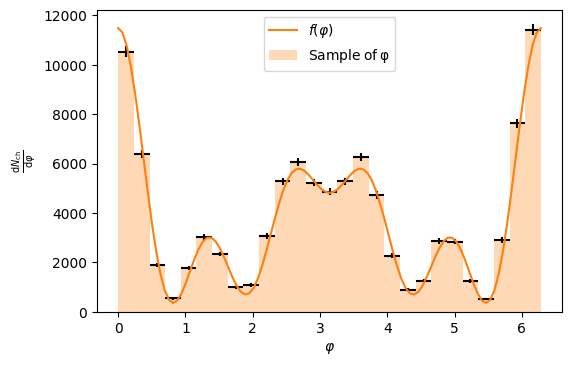

In [39]:
def test_phi_distributions(Nch=24000):
    from numpy import linspace, pi
    x, dx = linspace(0,2*pi,101,retstep=True)
    
    vn = [0.1,0.8,0.3,0.4,0.5]
    psin = [0,0,0,0,0]

    pdf  = f(x,vn=vn,psin=psin)
    pdf  /= (pdf.sum() * dx)

    phi = generate_azimuthals(Nch,vn,psin)

    from nbi_stat import histogram, plot_hist
    h = histogram(phi,normalize=False)

    from matplotlib.pyplot import figure, gca, plot, xlabel, ylabel, legend

    fig = figure(dpi=100)
    ax = gca()  

    plot_hist(*h,as_bar=True,label=r'$\mathrm{Sample \: of \: \varphi}$',alpha=.3,ax=ax,color='C1');
    plot(x,pdf*Nch,label=r'$f(\varphi)$',c='C1')

    ylabel(r'$\frac{\mathrm{d}N_\mathrm{ch}}{\mathrm{d}\varphi}}}$')
    xlabel(r'$\varphi$');
    legend();
    return
test_phi_distributions(Nch=24000)

In [40]:
def epsilonn_to_vn(epsn,psin,factors,phases):
    """Converts eccentricities to flow coefficients 
        and rotate symmetry plane to eccentricity plane
    
    Parameters
    ----------
    epsn : list of length n harmonics
        The eccentricities for each
        harmonic
        
    psin : list of length n harmonics
        The phases of symmetry planes 
        for each harmonic 
        
    factors : list of length n harmonics
        Factors to enhance the flow coefficients
        
    Returns
    -------
    vn : array of shape (n,)
        The flow coefficients
    
    psin_ : array of shape (n,)
        
        
    """
    from numpy import asarray, arange,pi, newaxis
    
    # convert to array and correct dimensions
    psin = asarray(psin)
    psin = psin.reshape((psin.shape[0], -1))
    phases = phases.reshape((phases.shape[0], -1))
    
    from numpy import broadcast_to, cos, dot
    # broadcast an (Npoints,n) psi array, e.g. (100,[ᴪ1,ᴪ2,..ᴪn])
    phases_array = broadcast_to(phases,(phases.size,len(psin))) 
    
    # rotate the angle of emission relative to the epsilon planes
    psin_ = (psin + phases_array.T) % 2*pi
    
    # compute flow coefficitents
    vn = factors * epsn
    
    return vn, psin_

# An Example Run
___
Simulation of 100 Pb-Pb collisions has been run as `python3 nbi_glauber.py Pb Pb -n 100 -o data.npy`. 10 000 Pb-Pb takes ~ 1 minute. 

In [41]:
def run_and_create(data,factors,phases,ancestor_model,particle_production_model):
    """Generate charged particles in (eta,phi) of glauber events
    
    The glauber data is organized as follows:
    
    b = data[:,0], psi = data[:,1], xsec = data[:,2], npart = data[:,3], 
    ncoll = data[:,4], ecc = data[:,5:10], psin = data[:,10:15]
    
    Parameters
    ----------
    data : array of shape (Nevents,15)
    
    factors: array of shape (n,)
        The factors eccentries are multiplied by to get the flow coeff.
    
    Returns
    -------
    dist : array of shape (Nevents,75,75)
        The number of particles in (eta,phi)
    xed : array of shape (76,)
        The x edges of dist
    yed : array of shape (76,)
        The y edges of dist
    """
    
    # save data into variables
    Npart = data[:,3]
    Ncoll = data[:,4]
    ecc = data[:,5:10]
    psi = data[:,10:15]
    
    # get flow coefficients and symmtetry planes
    vn, psin = epsilonn_to_vn(ecc,psi,factors,phases)    
    
    # create number of charged particles
    Nch = charged_particle_production(Npart,Ncoll,ancestor_model,particle_production_model)
                                      
    hits = [] # list for 2d histogram
    xed = [] # list for x edges
    yed = [] # list for y edges

    for event,charged_particles in enumerate(Nch):
        
        # get rapidities
        y = generate_rapidities(Nch=charged_particles,sigma=3)
        
        # convert to pseudorapidity
        eta = dy_to_deta(y,a=1/2)
        
        # get azimuthals
        phi = generate_azimuthals(Nch=charged_particles,vn=vn[event],psin=psin[event])
        
        from numpy import histogram2d, pi, inf
        # create d^2N/dphideta
        H, xedges, yedges = histogram2d(phi,eta,bins=[32,32],range=[[0, 2*pi], [-5, 5]])
        
        # save to list
        hits.append(H.T)
        xed.append(xedges)
        yed.append(yedges)
    
    from numpy import asarray
    hits = asarray(hits)
    xed = asarray(xed)
    yed = asarray(yed)

    return hits, xed, yed, vn, psin, Nch

Lets load data from a Glauber simulation and declare factors used to compute the flow coefficients

In [42]:
from numpy import array, pi, arange

phases = pi/(arange(5)+1)
factors = array([.5,2,1,1,1]) 

from numpy import load
data = load("../data/data.npy")

Creating distribution. 10 000 events takes $\sim 20 \: \mathrm{s}$.

In [43]:
from functools import partial
%time event_data = run_and_create(data,factors,phases, partial(two_component,alpha=0.5),partial(negative_binomial,mu=20,k=2))

CPU times: user 337 ms, sys: 24.5 ms, total: 361 ms
Wall time: 838 ms


## Vizualize

In [44]:
def plot_event(event_data,event):  
    
    hits, xed, yed, vn, psin, Nch = event_data[0][event],\
                                    event_data[1][event],\
                                    event_data[2][event],\
                                    event_data[3][event],\
                                    event_data[4][event],\
                                    event_data[5][event]
    
    # some of Nch are out of eta range,
    # and thus not detected but still 
    # produced from the collision ...
    # we will only consider detected 
    # charged particles 
    Nch_detected = int(hits.sum())

    from matplotlib.pyplot import figure, gca, legend, plot, xlabel, ylabel, legend, xticks, title, pcolormesh, colorbar
    
    # plot
    fig = figure(dpi=100)
    
    fig.suptitle(fr'$N_{{\mathrm{{ch}}}}={Nch_detected}$',y=0.99,x=0.45,fontsize=10)
    ax = gca()     
    
    from numpy import meshgrid, arange
    X, Y = meshgrid(xed, yed)
    
    from matplotlib.colors import BoundaryNorm
    from matplotlib.cm import cividis
    
    # for color map
    cmap = cividis
    bounds = arange(hits.min(),hits.max()+2,dtype=int)

    norm = BoundaryNorm(boundaries=bounds,ncolors=cmap.N,clip=True)
    
    pcolormesh(X, Y, hits,cmap=cmap,norm=norm)
    
    # more colormap workarounds 
    loc = bounds + 0.5
    cb = colorbar();
    cb.set_ticks(loc)
    cb.set_ticklabels(bounds)
    cb.ax.tick_params(labelsize=5)
    
    # other plotting variables
    tick_pos= [0, pi/2, pi, 3*pi/2, 2*pi]
    labels = ['0','$\pi/2$','$\pi$','$3\pi/2$','$2\pi$']
    xticks(tick_pos, labels)
    
    ax.set_title(fr'$v_1={vn[0]:.2f} \ '
                 fr'v_2={vn[1]:.2f} \ '
                 fr'v_3={vn[2]:.2f} \ '
                 fr'v_4={vn[3]:.2f} \ '
                 fr'v_5={vn[4]:.2f} \ $', fontsize=10)
    
    xlabel(r'$\varphi$')
    ylabel(r'$\eta$')
        
    return fig

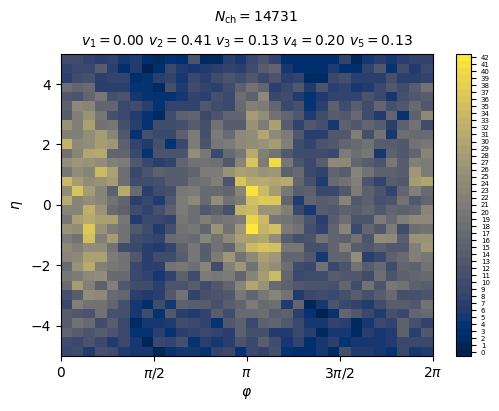

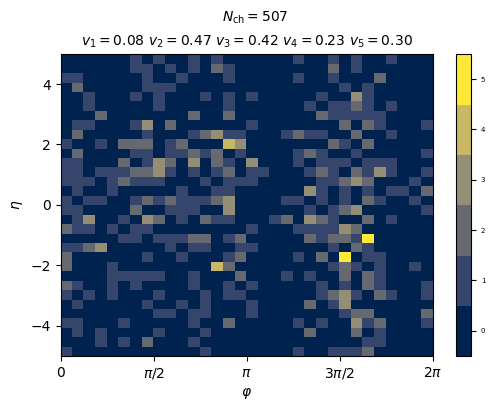

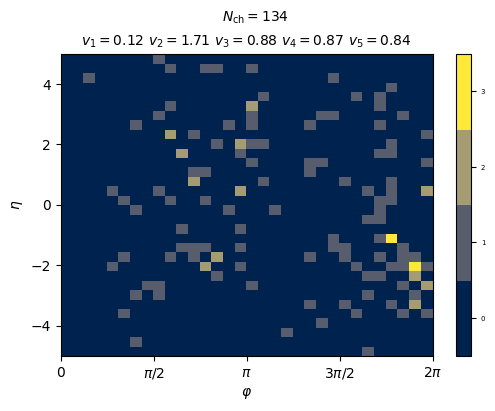

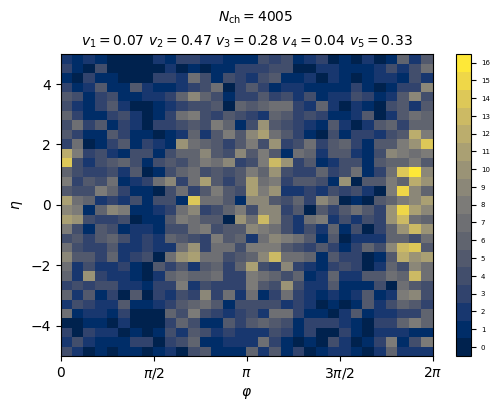

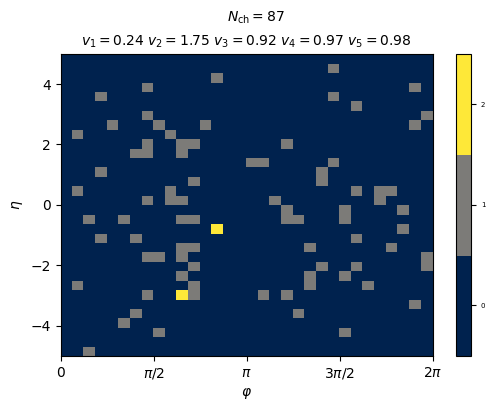

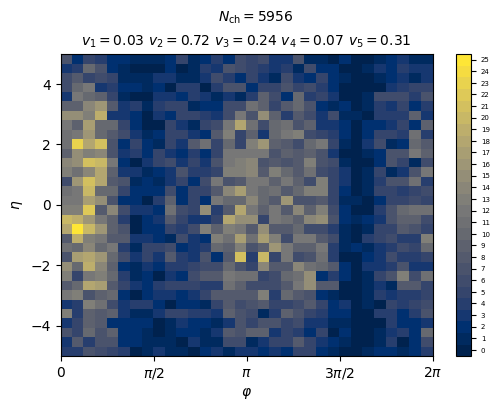

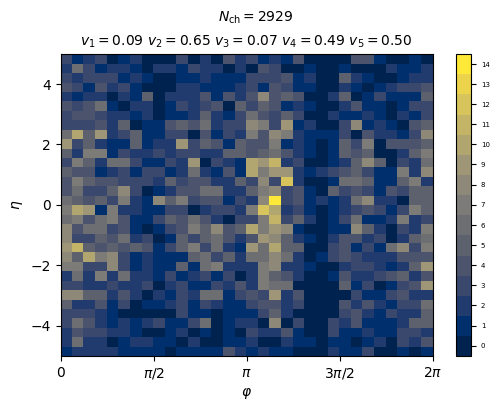

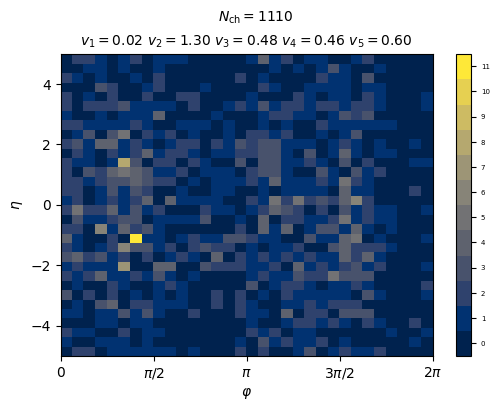

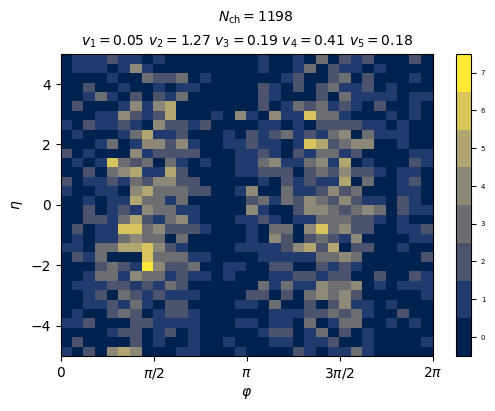

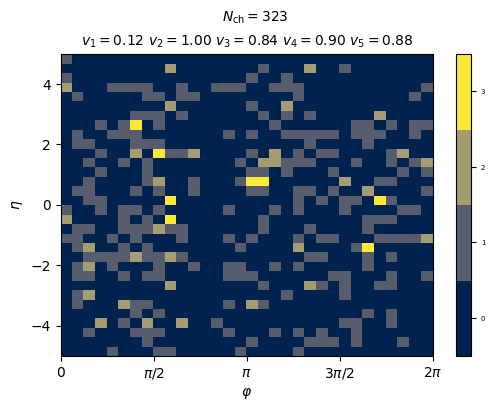

In [45]:
for i in range(0,10):
    plot_event(event_data,i);
    from matplotlib.pyplot import savefig
    # uncomment to save figures
    #savefig('hit_test_'+str(i)+'.pdf')   

## Save the data

In [46]:
from numpy import save
# uncomment to save output distributions and flow coeff.
#save('hits_1e5_train.npy', event_data[0]) 
#save('flow_coeff_1e5_train.npy', event_data[3]) 